## Importing Packages

In [54]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\khadi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [55]:
#Import Needed Packages

import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
from datetime import datetime
import plotly.offline as py
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest
from matplotlib import ticker
from datetime import datetime, timedelta
%matplotlib inline

##  Loading Data

In [56]:
# Read The Data 
df = pd.read_csv(r"C:\Users\khadi\OneDrive\Desktop\train.tsv",sep='\t')

#### Overview

In [57]:
df.head() # View The First 5 Rows 

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [58]:
df.shape #The number of Rows and Columns of The DataFrame

(1482535, 8)

In [59]:
df.info() #Summary of The Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


# Cleaning 

### Missing Values

In [60]:
df.isnull().sum(axis=0) #Number of Nulls in each column

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

- The column with the most null values is **brand_name** : **632682**
- Then, **6327** records have null values in **category_name** column.
- Only **4** items miss their **item_description**

In [61]:
def mode_func(x):
    return x.mode().iloc[0] if not x.mode().empty else None
# grouped the data by (category_name) then we got the brand_name mode of each group
brand_name_grouped = df.groupby('category_name')['brand_name']
grouped = brand_name_grouped.agg(mode_func).reset_index()

# Display the result
print(grouped)

                                     category_name         brand_name
0                          Beauty/Bath & Body/Bath  Bath & Body Works
1           Beauty/Bath & Body/Bathing Accessories  Victoria's Secret
2                     Beauty/Bath & Body/Cleansers  Bath & Body Works
3                         Beauty/Bath & Body/Other  Bath & Body Works
4      Beauty/Bath & Body/Scrubs & Body Treatments  Bath & Body Works
...                                            ...                ...
1282  Women/Women's Handbags/Messenger & Crossbody       Michael Kors
1283                  Women/Women's Handbags/Other              Coach
1284                Women/Women's Handbags/Satchel       Michael Kors
1285           Women/Women's Handbags/Shoulder Bag              Coach
1286       Women/Women's Handbags/Totes & Shoppers  Victoria's Secret

[1287 rows x 2 columns]


In [62]:
#fill the missing value in each group with the brand_name mode of its group 
modes = brand_name_grouped.transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print(modes)
# Fill missing values in 'brand_name' with the calculated modes within each group
df['brand_name'] = df['brand_name'].fillna(modes)

C:\Users\khadi\AppData\Local\Temp\ipykernel_10560\4252080452.py:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\khadi\AppData\Local\Temp\ipykernel_10560\4252080452.py:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\khadi\AppData\Local\Temp\ipykernel_10560\4252080452.py:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\khadi\AppData\Local\Temp\ipykernel_10560\4252080452.py:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\khadi\AppData\Local\Temp\ipykernel_10560\4252080452.py:2: FutureWarning

0                  Nike
1                 Apple
2            FOREVER 21
3              Rae Dunn
4          Kendra Scott
               ...     
1482530         LuLaRoe
1482531          Disney
1482532          Fitbit
1482533        Rae Dunn
1482534    Michael Kors
Name: brand_name, Length: 1482535, dtype: object


In [63]:
modes.isnull().any()

True

In [64]:
# NaN Values means unknown brands :
df["brand_name"].fillna("No Brand", inplace=True)# fill the remaining missing values with "No Brand"
# drop rows with null values:
df.dropna(inplace=True)

In [65]:
df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
dtype: int64

### Remove Items with 0 Price

In [66]:
df = df[df.price != 0] # drop records with price 0

In [67]:
df.shape

(1475343, 8)

## Feature Engineering

In [68]:
def category_tranformation(category):
    try:
        category, sub_category_1, sub_category_2 = category.split('/')
        return category, sub_category_1, sub_category_2
    except:
        return 'Other', 'Other', 'Other'

In [69]:
df['main_category'], df['category_sub1'], df['category_sub2'] = zip(*df['category_name'].apply(category_tranformation))
train_category = df[['main_category','category_sub1','category_sub2','price']]
train_category.head()

C:\Users\khadi\AppData\Local\Temp\ipykernel_10560\3563282577.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\khadi\AppData\Local\Temp\ipykernel_10560\3563282577.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\khadi\AppData\Local\Temp\ipykernel_10560\3563282577.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,main_category,category_sub1,category_sub2,price
0,Men,Tops,T-shirts,10.0
1,Electronics,Computers & Tablets,Components & Parts,52.0
2,Women,Tops & Blouses,Blouse,10.0
3,Home,Home Décor,Home Décor Accents,35.0
4,Women,Jewelry,Necklaces,44.0


In [70]:
print("Number of unique Main Categories = %d." % df['main_category'].nunique())
print("Number of unique Sub-Categories-1 = %d." % df['category_sub1'].nunique())
print("Number of unique Sub-Categories-2 = %d." % df['category_sub2'].nunique())

Number of unique Main Categories = 10.
Number of unique Sub-Categories-1 = 113.
Number of unique Sub-Categories-2 = 864.


In [71]:
train_category['main_category'].nunique()

10

#Sentiments Score
 — A score ranging between 0–100% that shows the polarity of the sentence i.e how much is a sentence positive, negative, and neutral. A score of 100% shows total positivity and vice versa. An overall score is given by the compound.

In [72]:
sia = SentimentIntensityAnalyzer()

In [73]:
df['compound_sentiment_score'] = df['item_description'].apply(lambda x: sia.polarity_scores(x)['compound'])



C:\Users\khadi\AppData\Local\Temp\ipykernel_10560\1978475727.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [74]:
df

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_category,category_sub1,category_sub2,compound_sentiment_score
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Nike,10.0,1,No description yet,Men,Tops,T-shirts,-0.2960
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,0.8957
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,0.6792
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Rae Dunn,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,0.6808
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Kendra Scott,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf,0.5874
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses,0.2235
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,Fitbit,12.0,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories,0.6249
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,Rae Dunn,45.0,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents,0.0000


 Extarct item_description length and word count featuers from item_description

In [75]:
# Calculate and store item_description length (desc_len)
df['desc_len'] = df['item_description'].apply(lambda x: len(x))

# Calculate and store count of words in item_description (desc_cnt)
df['desc_cnt'] = df['item_description'].apply(lambda x: len(x.split()))

C:\Users\khadi\AppData\Local\Temp\ipykernel_10560\2506949473.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\khadi\AppData\Local\Temp\ipykernel_10560\2506949473.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
df

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_category,category_sub1,category_sub2,compound_sentiment_score,desc_len,desc_cnt
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Nike,10.0,1,No description yet,Men,Tops,T-shirts,-0.2960,18,3
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,0.8957,188,36
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,0.6792,124,29
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Rae Dunn,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,0.6808,173,32
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Kendra Scott,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,0.0000,41,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf,0.5874,128,22
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses,0.2235,48,8
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,Fitbit,12.0,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories,0.6249,41,8
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,Rae Dunn,45.0,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents,0.0000,120,28


In [77]:
# df.drop(columns=['item_description'], inplace=True)

C:\Users\khadi\AppData\Local\Temp\ipykernel_10560\1498047400.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



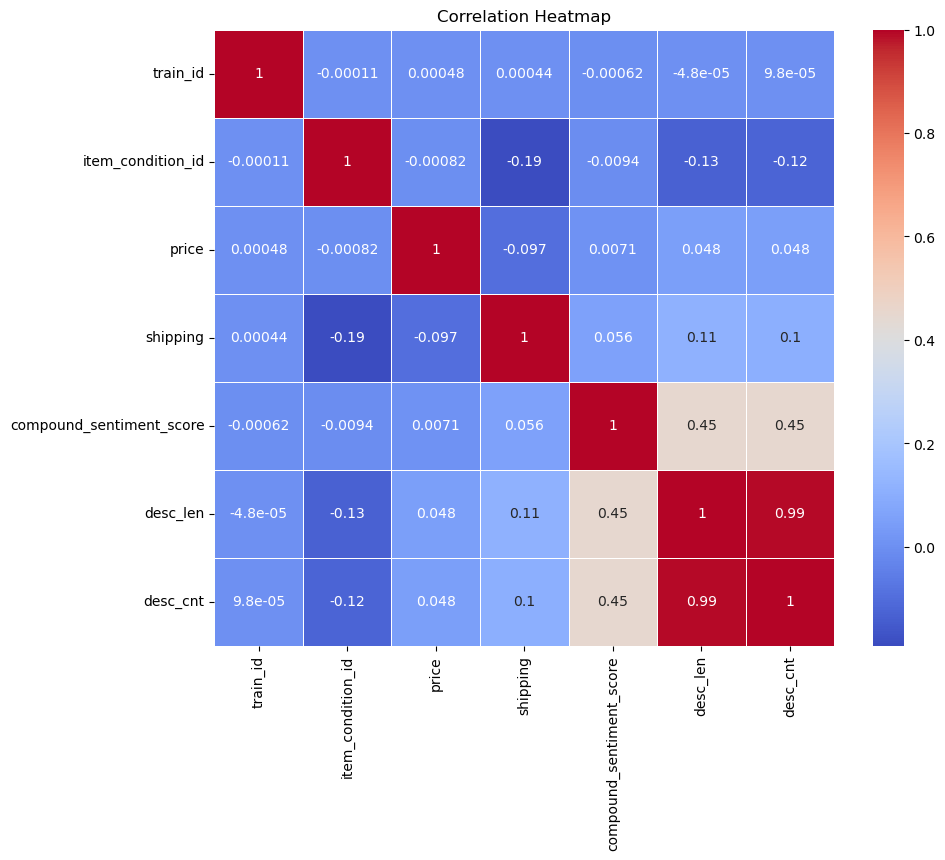

In [78]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Set the figure size (optional)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [80]:
X_train = df.drop(columns=['price'])  # Features
y_train = df['price']  

#Encoding and ColumnTransformer

applied ColumnTransformer with transformers — Counvectorizer, TfidfVectorizer, and Normalizer to transform the text and numerical features into a single feature space.

CountVectorizer and TfidfVectorizer are both text vectorization techniques commonly used in natural language processing (NLP) and machine learning for converting text data into numerical feature vectors

Example:

Document 1: "I love programming."
Document 2: "Programming is fun."
Document 3: "I enjoy coding."

>Using CountVectorizer:

CountVectorizer will convert this corpus into a matrix of word counts. Here's what it would look like:

Vocabulary: ["I", "love", "programming", "is", "fun", "enjoy", "coding"]
Document 1: [1, 1, 1, 0, 0, 0, 0]
Document 2: [0, 0, 1, 1, 1, 0, 0]
Document 3: [1, 0, 0, 0, 0, 1, 1]

>Using TfidfVectorizer:

TfidfVectorizer takes into account not just word counts but also the importance of each word in the corpus. It calculates TF-IDF scores for each word in each document:

Vocabulary: ["I", "love", "programming", "is", "fun", "enjoy", "coding"]
Document 1: [0.59, 0.81, 0.5, 0, 0, 0, 0]
Document 2: [0, 0, 0.5, 0.81, 0.81, 0, 0]
Document 3: [0.59, 0, 0, 0, 0, 0.81, 0.81]

In [82]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer
name_vec = CountVectorizer(
    ngram_range=(1, 2), max_features=150000, 
    stop_words=['why', 'x', 'w', 's', 'e', 'ty', 'wgf'],
    token_pattern = r'(?u)\w+|[^\w\s]',
)

desc_vec = TfidfVectorizer(
    ngram_range=(1, 3), max_features=150000, token_pattern = r'(?u)\w+|[^\w\s]',
)

bname_vec = CountVectorizer( ngram_range = (1, 2))
cat_vec = CountVectorizer( token_pattern='.+')
cat_ship_vec = CountVectorizer( token_pattern='.+')

numeric_features = [
  'item_condition_id', 'shipping' , 'desc_cnt', 'desc_len','compound_sentiment_score'
]

col_transformer = ColumnTransformer(
    transformers=[
      ('numerical', Normalizer(), numeric_features),
      ('name', name_vec, 'name'),
      ('brand_name', bname_vec, 'brand_name'),
      ('item_description', desc_vec, 'item_description'),
      ('main_category', cat_vec, 'main_category'),
      ('category_sub1', cat_vec, 'category_sub1'),
      ('category_sub2', cat_vec, 'category_sub2'),
    ]
)


vectorizer = col_transformer.fit(X_train)
train_vec = vectorizer.transform(X_train)

#Stacking

In [84]:
pip install lightgbm


     ---------------------------------------- 1.3/1.3 MB 3.0 MB/s eta 0:00:00


In [85]:
from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor
params = { 
  'objective': 'regression', 'learning_rate': 0.5, 'max_depth': 8,
  'n_estimators': 600, 'num_leaves': 120
}

estimators = [
  ('lr', Ridge(alpha=7)),
  ('svr', LGBMRegressor(**params, random_state=42)),
  ('lrr', Ridge(alpha=10)),
]

reg = StackingRegressor(
  estimators=estimators,
  final_estimator=Ridge(alpha=7),
  verbose=10, cv=3
)
reg.fit(train_vec, y_train)

KeyboardInterrupt: 